In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras.layers.recurrent import GRU


In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
df['Time ']=Normal_DPx['Time ']
df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [13]:
Cavdf['Time ']=Cavitation_DPx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [14]:
X_train=df

In [15]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,5.931638,0.809176,-1.136223,-0.561535,5.906167
1,5.931638,0.809176,-1.136223,-0.641717,5.906167
2,5.931638,0.809176,-1.136223,-0.617028,5.906167
3,5.931638,0.809176,-1.136223,-1.032546,5.906167
4,5.931638,0.809176,-1.136223,-0.543018,5.906167
...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558


In [16]:
X_train=np.array(X_train)


In [17]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [18]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [19]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(GRU(25, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(GRU(5, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(GRU(5, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(GRU(25, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [20]:
X_test=Cavdf

In [21]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,-0.637856,1.664881,1.177414,1.180099,-0.730041
1,1.465952,1.664881,1.177414,0.788860,1.380058
2,1.465952,1.664881,1.177414,0.626090,1.380058
3,1.465952,1.664881,1.177414,1.072405,1.380058
4,1.465952,1.664881,1.177414,0.198206,1.380058
...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096


In [22]:
X_test.shape

(1048576, 5)

In [23]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 61s 27ms/step - loss: 0.2516 - val_loss: 0.2028
Epoch 2/150
1797/1797 [==============================] - 48s 26ms/step - loss: 0.0817 - val_loss: 0.1513
Epoch 3/150
1797/1797 [==============================] - 50s 28ms/step - loss: 0.0622 - val_loss: 0.1353
Epoch 4/150
1797/1797 [==============================] - 54s 30ms/step - loss: 0.0566 - val_loss: 0.1277
Epoch 5/150
1797/1797 [==============================] - 54s 30ms/step - loss: 0.0527 - val_loss: 0.1245
Epoch 6/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0505 - val_loss: 0.1222
Epoch 7/150
1797/1797 [==============================] - 53s 30ms/step - loss: 0.0487 - val_loss: 0.1081
Epoch 8/150
1797/1797 [==============================] - 56s 31ms/step - loss: 0.0475 - val_loss: 0.1141
Epoch 9/150
1797/1797 [==============================] - 55s 30ms/step - loss: 0.0463 - val_loss: 0.1151
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 58s 32ms/step - loss: 0.0293 - val_loss: 0.1179
Epoch 79/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0288 - val_loss: 0.1167
Epoch 80/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0293 - val_loss: 0.1187
Epoch 81/150
1797/1797 [==============================] - 57s 32ms/step - loss: 0.0287 - val_loss: 0.1194
Epoch 82/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0290 - val_loss: 0.1195
Epoch 83/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0291 - val_loss: 0.1237
Epoch 84/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0289 - val_loss: 0.1241
Epoch 85/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0289 - val_loss: 0.1239
Epoch 86/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0293 - val_loss: 0.1265
Epoch 87/150
1797/1797 [==============================] - 5

In [24]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 130s 4ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

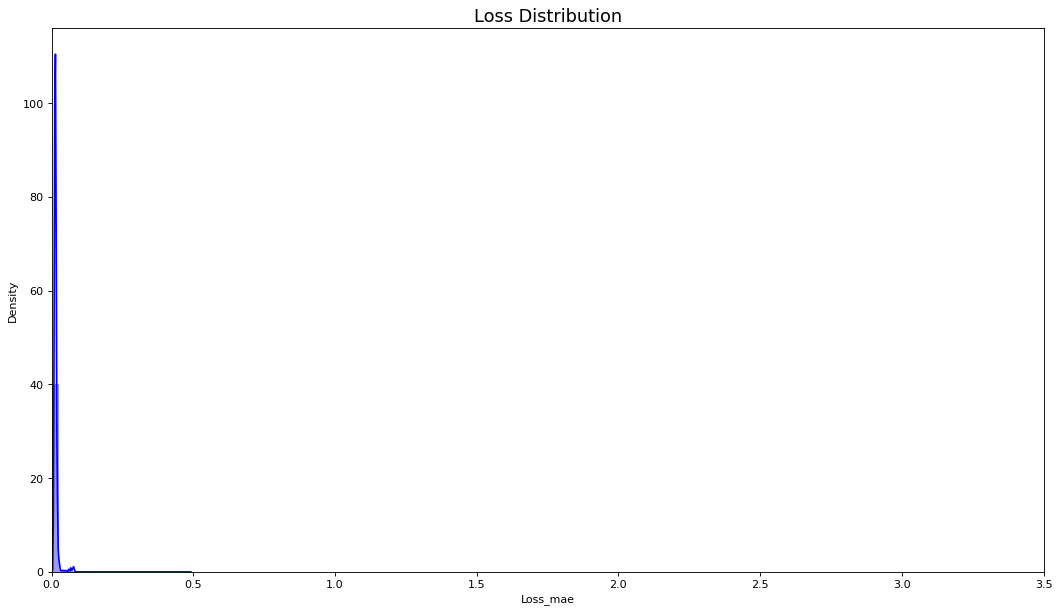

In [25]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [26]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 159s 5ms/step


In [27]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

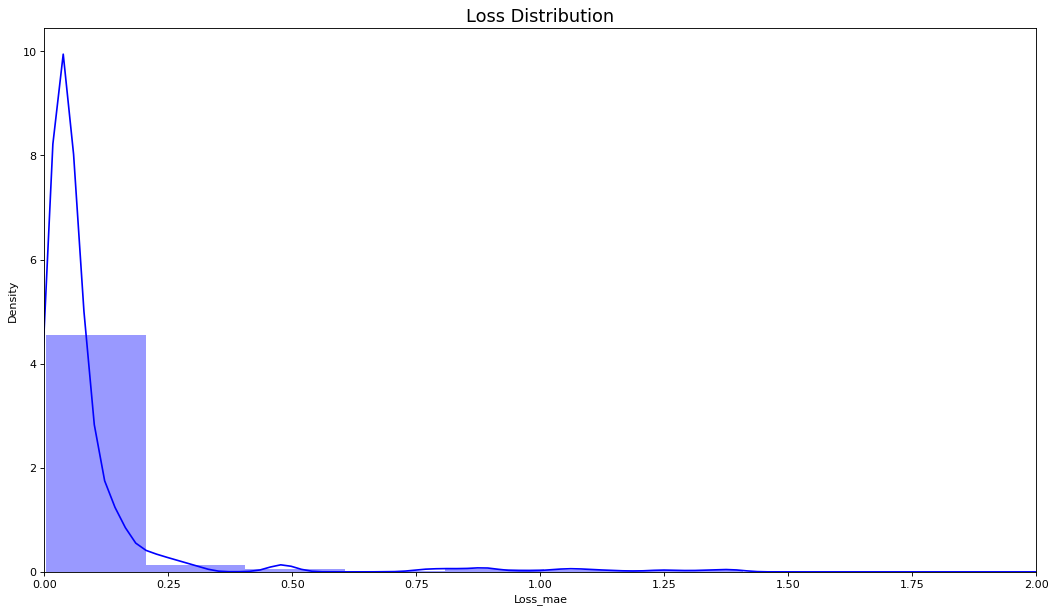

In [28]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.75)

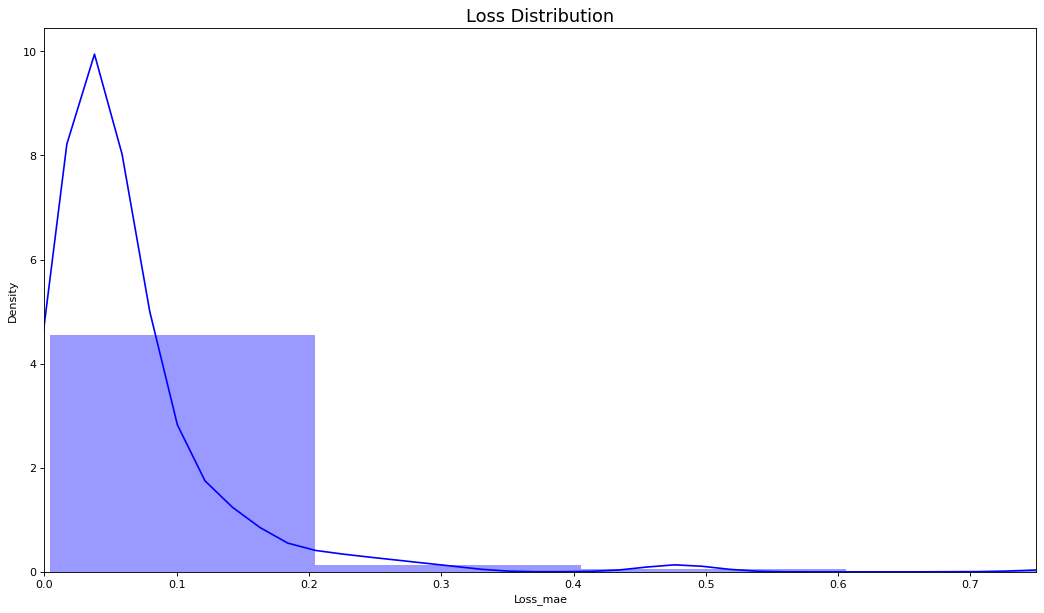

In [29]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.75])

In [34]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.5

In [35]:
test_mae_loss.shape

(1048576, 1)

In [36]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


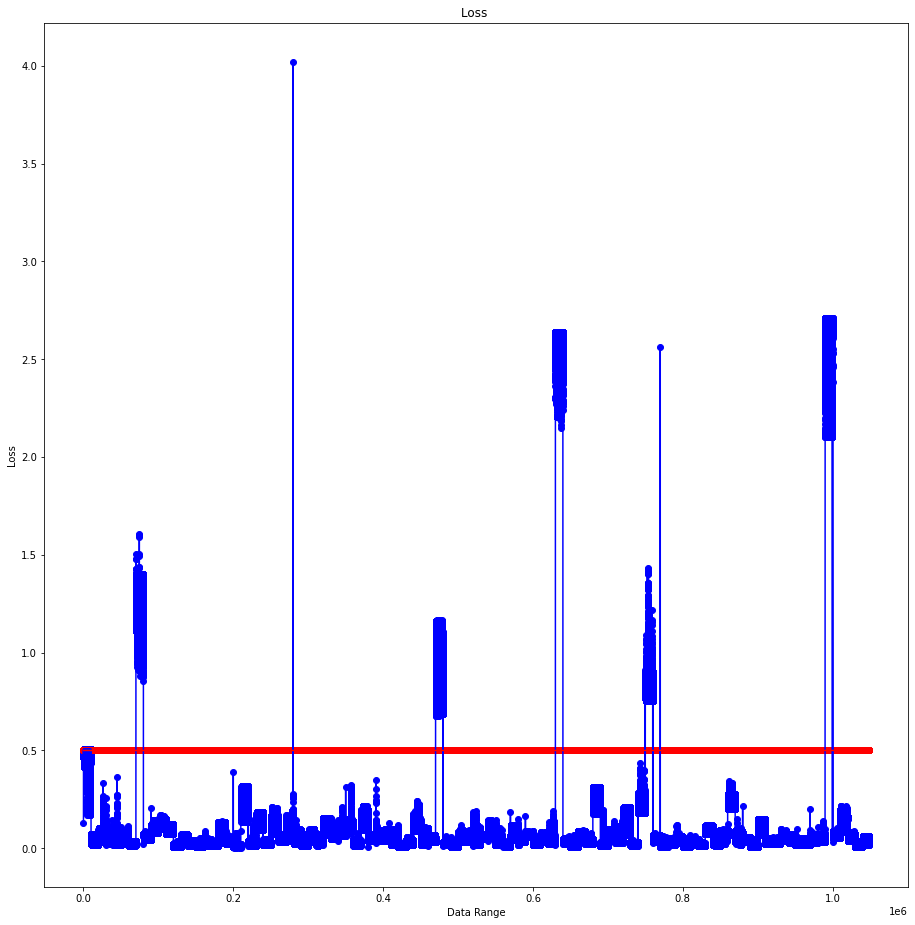

In [37]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [38]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000,0.129140,0.5,False
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098,0.466758,0.5,False
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195,0.476484,0.5,False
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293,0.468084,0.5,False
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391,0.487193,0.5,False
...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512,0.021130,0.5,False
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609,0.038880,0.5,False
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707,0.031085,0.5,False
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805,0.023630,0.5,False


In [39]:
test_score_df["anomaly"][1]

False

In [40]:
anomalies=test_score_df


In [41]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
48,1.465952,1.664881,1.177414,-0.064306,1.380058,0.004687,0.506220,0.5,True
50,1.465952,1.664881,1.177414,-0.122056,1.380058,0.004883,0.506689,0.5,True
55,1.465952,1.664881,1.177414,-0.103698,1.380058,0.005371,0.506618,0.5,True
60,1.465952,1.664881,1.177414,0.038039,1.380058,0.005859,0.501129,0.5,True
63,1.465952,1.664881,1.177414,-0.019711,1.380058,0.006152,0.505045,0.5,True
...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-0.095819,-4.897004,97.655762,2.654529,0.5,True
999996,-4.945634,-1.169536,0.439230,0.547380,-4.897004,97.655859,2.661914,0.5,True
999997,-4.945634,-1.169536,0.439230,-0.250711,-4.897004,97.655957,2.634903,0.5,True
999998,-4.945634,-1.169536,0.439230,0.261233,-4.897004,97.656055,2.705153,0.5,True


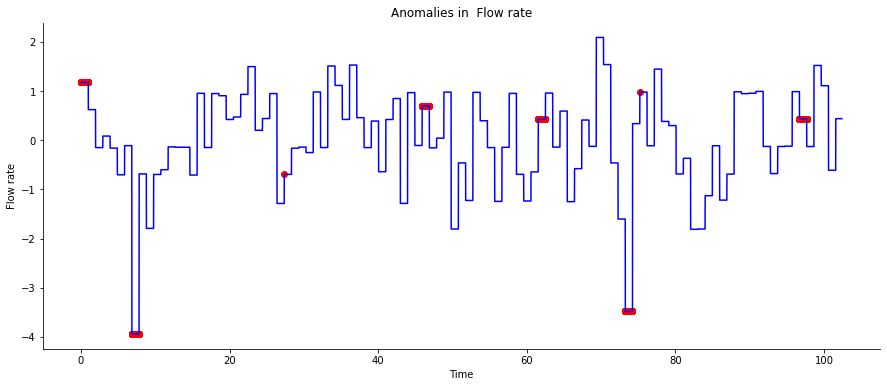

In [42]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

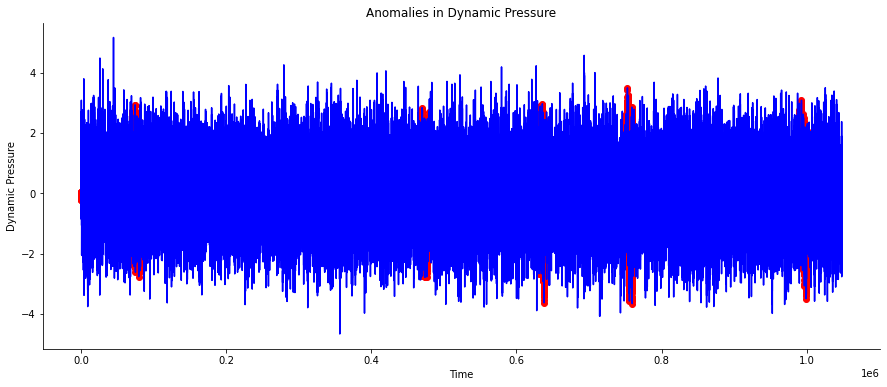

In [43]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

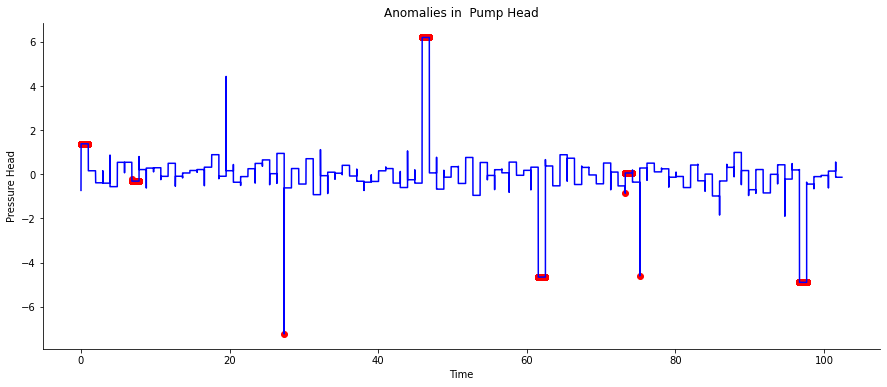

In [46]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

In [44]:
model.save("Bi_GRU01_DP")


INFO:tensorflow:Assets written to: Bi_GRU01_DP\assets


# Vibration


In [47]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [48]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [49]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [50]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [51]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [52]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [53]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [54]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [55]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [56]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [57]:
df['Time ']=Normal_Vibx['Time ']
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167,0.000195
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167,0.000391
...,...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558,89.843555


In [58]:
Cavdf['Time ']=Cavitation_Vibx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391
...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805


In [59]:
X_train=df

In [60]:
X_train=X_train.drop(columns=['Time '])
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558


In [61]:
X_train=np.array(X_train)


In [62]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [63]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [64]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.Bidirectional(GRU(36, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add(layers.Bidirectional(GRU(6, activation='relu', return_sequences=False)))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.Bidirectional(GRU(6, activation='relu', return_sequences=True)))
model.add(layers.BatchNormalization())

model.add((layers.Bidirectional(GRU(36, activation='relu', return_sequences=True))))
model.add(layers.BatchNormalization())
         
model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [65]:
X_test=Cavdf

In [66]:
X_test=X_test.drop(columns=['Time '])
X_test

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096


In [67]:
X_test.shape

(1048576, 6)

In [68]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 178s 87ms/step - loss: 0.2498 - val_loss: 0.1897
Epoch 2/150
1797/1797 [==============================] - 150s 83ms/step - loss: 0.0706 - val_loss: 0.1122
Epoch 3/150
1797/1797 [==============================] - 151s 84ms/step - loss: 0.0607 - val_loss: 0.1103
Epoch 4/150
1797/1797 [==============================] - 150s 83ms/step - loss: 0.0563 - val_loss: 0.0919
Epoch 5/150
1797/1797 [==============================] - 152s 84ms/step - loss: 0.0535 - val_loss: 0.0867
Epoch 6/150
1797/1797 [==============================] - 153s 85ms/step - loss: 0.0513 - val_loss: 0.0767
Epoch 7/150
1797/1797 [==============================] - 152s 85ms/step - loss: 0.0496 - val_loss: 0.0815
Epoch 8/150
1797/1797 [==============================] - 153s 85ms/step - loss: 0.0481 - val_loss: 0.0720
Epoch 9/150
1797/1797 [==============================] - 152s 85ms/step - loss: 0.0472 - val_loss: 0.0722
Epoch 10/150
1797/1797 [======================

1797/1797 [==============================] - 157s 87ms/step - loss: 0.0303 - val_loss: 0.0777
Epoch 78/150
1797/1797 [==============================] - 155s 86ms/step - loss: 0.0301 - val_loss: 0.0799
Epoch 79/150
1797/1797 [==============================] - 155s 86ms/step - loss: 0.0300 - val_loss: 0.0833
Epoch 80/150
1797/1797 [==============================] - 155s 86ms/step - loss: 0.0299 - val_loss: 0.0804
Epoch 81/150
1797/1797 [==============================] - 157s 87ms/step - loss: 0.0297 - val_loss: 0.0849
Epoch 82/150
1797/1797 [==============================] - 168s 94ms/step - loss: 0.0299 - val_loss: 0.0856
Epoch 83/150
1797/1797 [==============================] - 159s 88ms/step - loss: 0.0293 - val_loss: 0.0832
Epoch 84/150
1797/1797 [==============================] - 158s 88ms/step - loss: 0.0294 - val_loss: 0.0854
Epoch 85/150
1797/1797 [==============================] - 159s 88ms/step - loss: 0.0295 - val_loss: 0.0906
Epoch 86/150
1797/1797 [==========================

In [69]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 141s 5ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

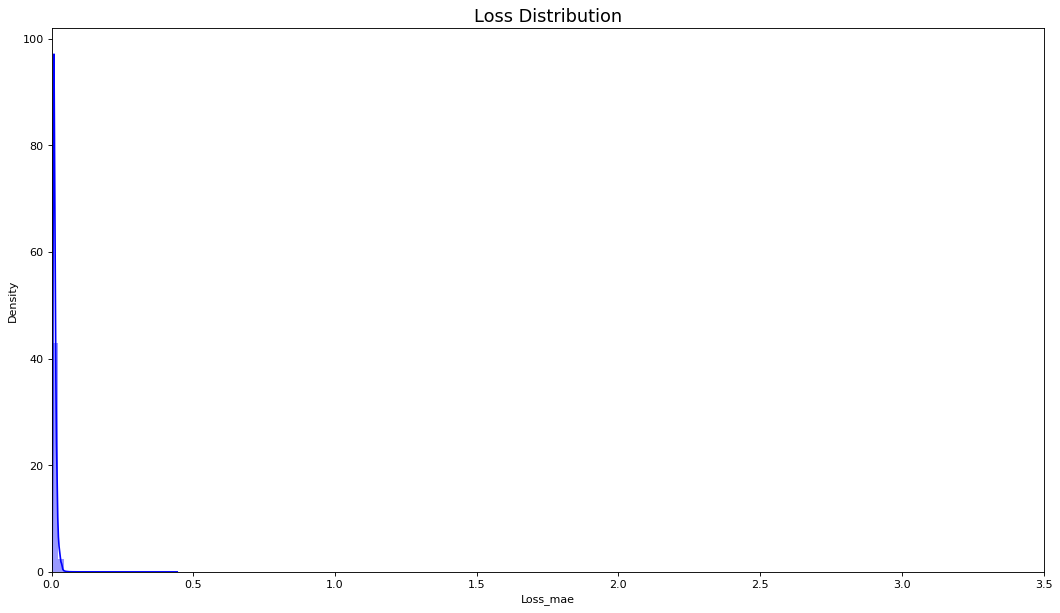

In [70]:
scored = pd.DataFrame(index=df.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [71]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 170s 5ms/step


In [72]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

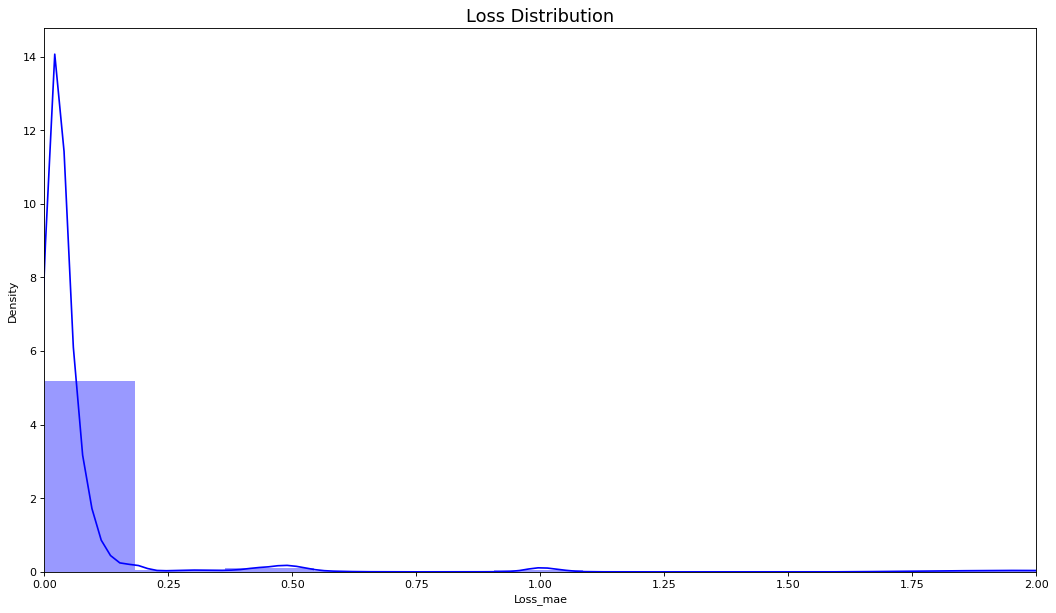

In [73]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

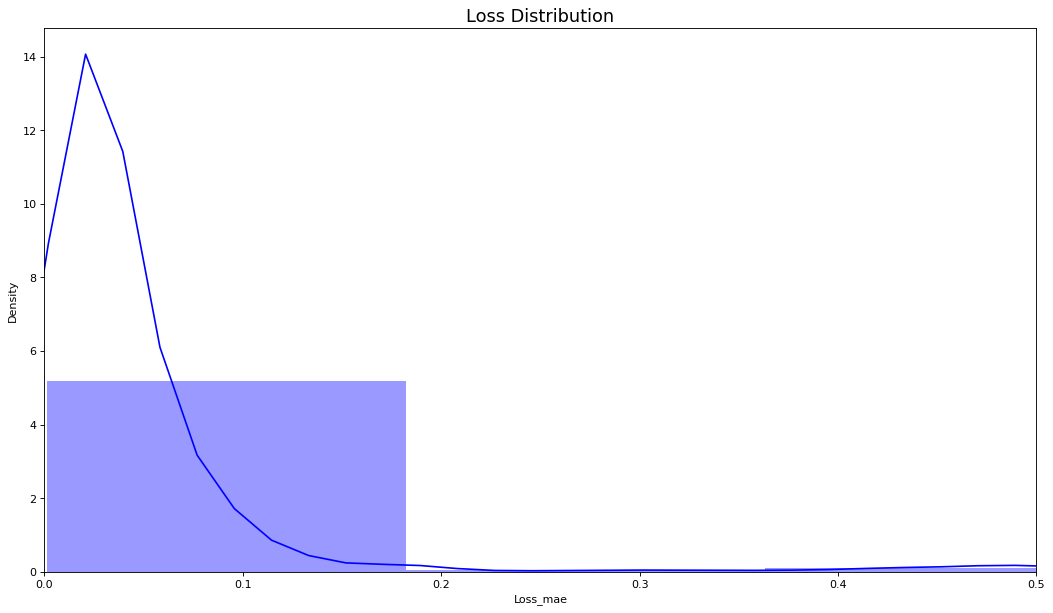

In [74]:
scored = pd.DataFrame(index=Cavdf.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [75]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.45


In [76]:
test_mae_loss.shape

(1048576, 1)

In [77]:
test_score_df = Cavdf
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


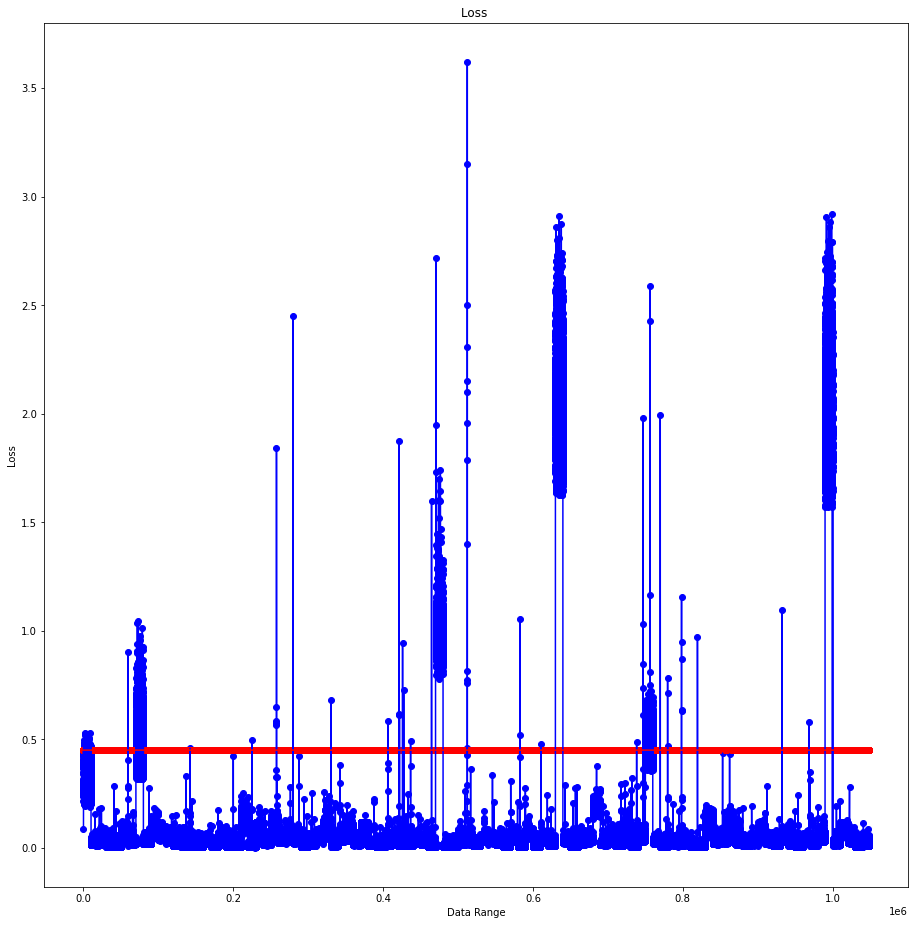

In [78]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [79]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000,0.085894,0.45,False
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098,0.339180,0.45,False
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195,0.281045,0.45,False
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293,0.274987,0.45,False
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391,0.292350,0.45,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512,0.019335,0.45,False
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609,0.011401,0.45,False
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707,0.012567,0.45,False
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805,0.021532,0.45,False


In [80]:
test_score_df["anomaly"][1]

False

In [81]:
anomalies=test_score_df


In [82]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
228,1.465952,1.664881,1.177414,-2.056281,2.244855,1.380058,0.022266,0.484792,0.45,True
410,1.465952,1.664881,1.177414,-1.436753,1.989764,1.380058,0.040039,0.450031,0.45,True
507,1.465952,1.664881,1.177414,-1.698613,2.291937,1.380058,0.049512,0.484910,0.45,True
549,1.465952,1.664881,1.177414,-1.612638,2.097398,1.380058,0.053613,0.466086,0.45,True
653,1.465952,1.664881,1.177414,-2.052033,2.042873,1.380058,0.063770,0.468298,0.45,True
...,...,...,...,...,...,...,...,...,...,...
999995,-4.945634,-1.169536,0.439230,-1.258038,1.267361,-4.897004,97.655762,1.906980,0.45,True
999996,-4.945634,-1.169536,0.439230,-1.532954,0.276891,-4.897004,97.655859,1.755909,0.45,True
999997,-4.945634,-1.169536,0.439230,-1.389872,-1.524488,-4.897004,97.655957,1.657399,0.45,True
999998,-4.945634,-1.169536,0.439230,-0.336533,-1.072029,-4.897004,97.656055,1.805220,0.45,True


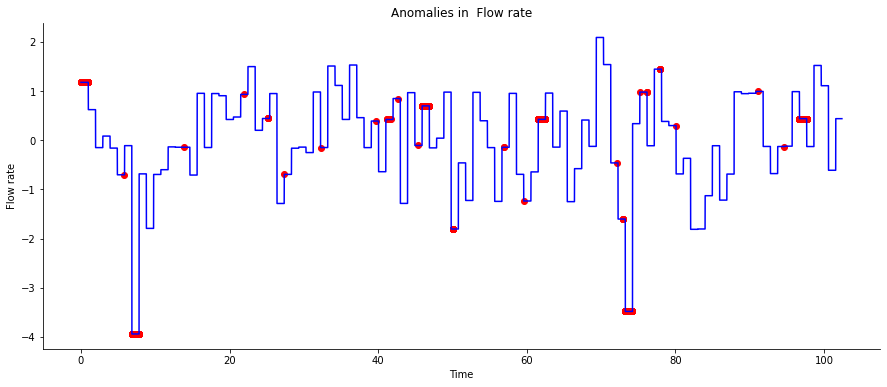

In [83]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

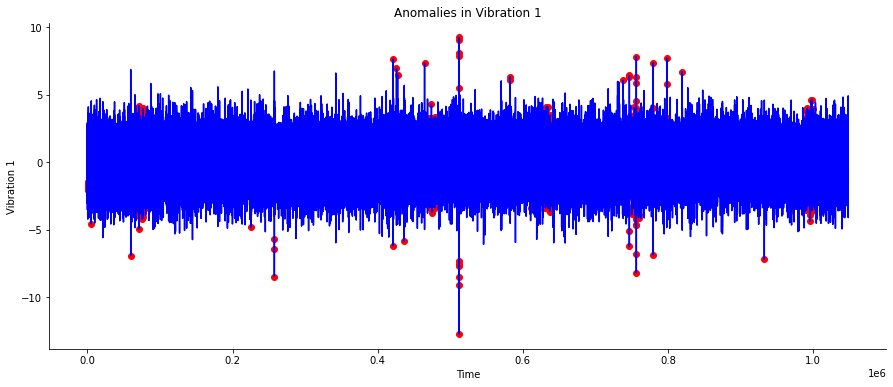

In [84]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

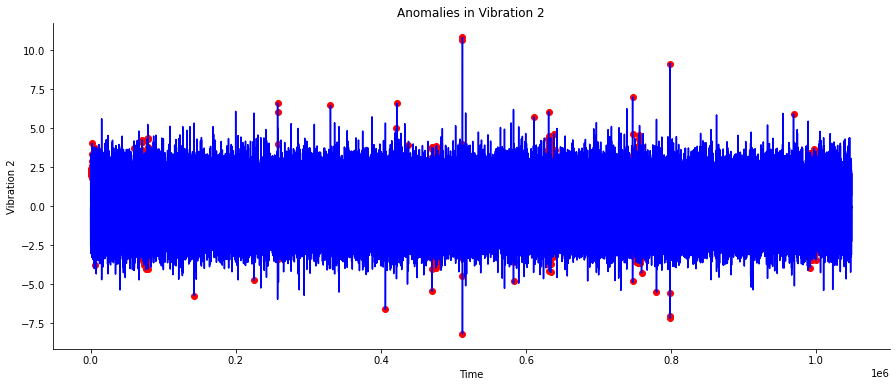

In [85]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

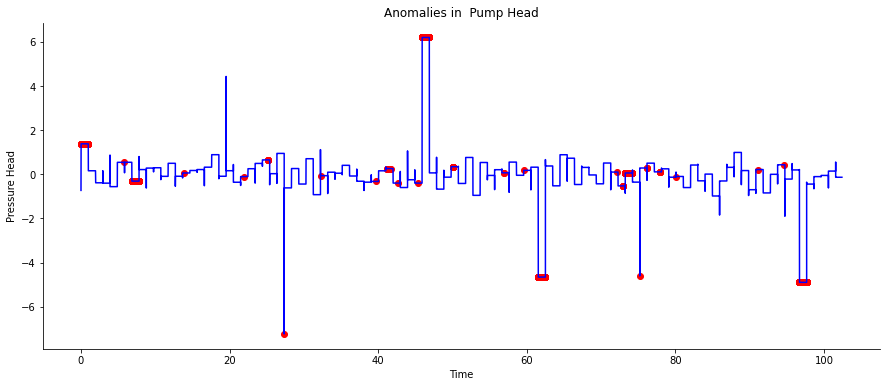

In [87]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

In [86]:
model.save("Bi_GRU01_Vib")


INFO:tensorflow:Assets written to: Bi_GRU01_Vib\assets


INFO:tensorflow:Assets written to: Bi_GRU01_Vib\assets
